# **Music Recommendation Systems**

### **Context**

With the advent of technology, societies have become more efficient with their lives. But at the same time, individual human lives have become much more fast-paced and distracted by leaving little time to explore artistic pursuits. Also, technology has made significant advancements in the ability to coexist with art and general entertainment. In fact, it has made it easier for humans with a shortage of time to find and consume good content. Therefore, one of the key challenges for the companies is to be able to figure out what kind of content their customers are most likely to consume. Almost every internet-based company's revenue relies on the time consumers spend on their platforms. These companies need to be able to figure out what kind of content is needed in order to increase the time spent by customers on their platform and make their experience better.
Spotify is one such audio content provider that has got a huge market base across the world. It has grown significantly because of its ability to recommend the ‘best’ next song to each and every customer based on the huge preference database they have gathered over time like millions of customers and billions of songs. This is done by using smart recommendation systems that can recommend songs based on the users’ likes/dislikes

### **Objective**

To recommend songs to a user based on their likelihood of liking those songs.

### **The key questions** 
- What are all songs they have listened to?
- What are the most favored songs and artists?

### **Problem Formulation**
Build a recommendation system to propose the top 10 songs for a user based on the likelihood of listening to those songs.

### **Data Dictionary**

The core data is the Taste Profile Subset released by The Echo Nest as part of the Million Song Dataset. There are two files in this dataset. One contains the details about the song id, titles, release, artist name, and the year of release. The second file contains the user id, song id, and the play count of users.

song_data
song_id - A unique id given to every song
title - Title of the song
Release - Name of the released album
Artist_name - Name of the artist 
year - Year of release
count_data
user _id - A unique id given to the user
song_id - A unique id given to the song
play_count - Number of times the song was played

###Data Source
http://millionsongdataset.com/


In [1]:
# importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity # to compute the cosine similarity between two vectors
from collections import defaultdict # dictionary output that doesn't raise a key error 

from sklearn.metrics import mean_squared_error

In [2]:
# reading datasets
count_df = pd.read_csv('count_data.csv')
song_df = pd.read_csv('song_data.csv')

In [3]:
display(count_df.head(10), song_df.head(10))

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


In [4]:
# datasets info
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [5]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


#### **Observations and Insights:**
- The count_df dataframe contains user_id, song_id, and the number of times a particular song has been played by a particular user. There are 4 columns and 20,000,000 observations in the dataset.
- The unnamed: 0 column seems like the index of the dataframe. We can drop this column.
- The song_df data has information/features of the song - title, released album, artist name, year of release. There are 5 columns and 10,000,00 observations in the dataset.

In [6]:
# checking for duplicated observations
print(song_df.duplicated().sum())
print(count_df.duplicated().sum())

498
0


In [7]:
# dropping duplicates from song_df
song_df = song_df.drop_duplicates(['song_id'])
song_df.duplicated().sum()

0

In [8]:
# merging datasets 
df = pd.merge(count_df, song_df, on='song_id', how='left')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [9]:
df.shape

(2000000, 7)

In [10]:
# using label encoding in song_id and user_id to ease our processing of the dataset
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
0,54961,153,1,The Cove,Thicker Than Water,Jack Johnson,0
1,54961,413,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,54961,736,1,Stronger,Graduation,Kanye West,2007
3,54961,750,1,Constellations,In Between Dreams,Jack Johnson,2005
4,54961,1188,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


**As this dataset is very large and has 2000000 observations, it is not computationally possible to build a model using this. Moreover, many users have only listened a few songs and also some songs are heard by very few users. Hence we can reduce the dataset by considering certain Logical assumptions.**

Here, we will be taking users who have listened at least 90 songs, and the songs that are listened by at least 120 users. 

In [11]:
# get column containing the users
users = df.user_id
# create a dictionary from users to their number of songs
ratings_count = {}
# adding users to the dictionary
for user in users:
    # if the user is already in the dict, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # if not, set their rating count to 1
    else:
        ratings_count[user] = 1

In [18]:
ratings_count

{54961: 45,
 39877: 1,
 56522: 8,
 40874: 2,
 45012: 19,
 22570: 13,
 66678: 25,
 47087: 11,
 46575: 6,
 54498: 66,
 6958: 103,
 63855: 52,
 27018: 401,
 59353: 6,
 20639: 4,
 70730: 2,
 55837: 100,
 6647: 32,
 50286: 6,
 56576: 118,
 3204: 20,
 38632: 3,
 19147: 15,
 74048: 22,
 48241: 9,
 19194: 20,
 13178: 28,
 42347: 12,
 57055: 7,
 5416: 18,
 49549: 153,
 44537: 13,
 12898: 22,
 58003: 1,
 18808: 65,
 43278: 15,
 70892: 35,
 73298: 15,
 9415: 5,
 21487: 52,
 76143: 10,
 63872: 24,
 359: 23,
 24533: 19,
 20082: 17,
 43942: 57,
 34420: 11,
 60317: 44,
 53867: 6,
 12635: 32,
 33130: 7,
 68660: 11,
 45949: 20,
 35629: 38,
 49202: 16,
 54615: 62,
 49608: 4,
 38327: 9,
 45988: 19,
 70816: 27,
 75935: 6,
 34234: 156,
 3540: 5,
 18971: 45,
 7798: 56,
 49235: 7,
 72300: 23,
 65206: 12,
 22784: 4,
 41940: 35,
 17679: 25,
 58071: 7,
 384: 63,
 47801: 61,
 29430: 11,
 7952: 3,
 54091: 16,
 72841: 8,
 9670: 32,
 37560: 64,
 69683: 47,
 6937: 12,
 54439: 103,
 35957: 10,
 19076: 58,
 44618: 26,

In [12]:
# only get users to have listened at least 90 different songs
# list to keep the users that will be removed
remove_users = []
# iterating throut the dict
for user, num_ratings in ratings_count.items():
    if num_ratings < 90:
        remove_users.append(user)

# removing users from the dataframe
df = df.loc[~df.user_id.isin(remove_users)]
df.shape

(438390, 7)

In [13]:
# get the column containing the songs
songs = df.song_id
# create a dict from songs to their number of listened times
listened_count = {}
# loop throut to songs
for song in songs:
    # if the song is already in the dict, just add 1 to the count
    if song in listened_count:
        listened_count[song] += 1
    # else, set their count to 1
    else:
        listened_count[song] = 1

In [19]:
listened_count

{12: 32,
 40: 59,
 151: 88,
 326: 96,
 447: 143,
 484: 100,
 512: 241,
 549: 156,
 703: 628,
 719: 144,
 892: 174,
 933: 54,
 974: 64,
 1050: 135,
 1056: 109,
 1357: 56,
 1409: 61,
 1480: 246,
 1600: 103,
 1671: 153,
 1752: 169,
 1756: 150,
 1787: 282,
 1818: 130,
 1867: 33,
 2107: 121,
 2126: 30,
 2168: 88,
 2267: 54,
 2289: 131,
 2304: 159,
 2425: 163,
 2501: 121,
 2542: 76,
 2543: 62,
 2555: 73,
 2701: 135,
 2719: 79,
 2737: 106,
 2898: 138,
 2928: 85,
 2994: 220,
 3043: 98,
 3074: 471,
 3134: 115,
 3144: 98,
 3434: 87,
 3447: 101,
 3491: 128,
 3524: 48,
 3551: 145,
 3718: 163,
 3796: 52,
 3801: 153,
 3881: 92,
 3907: 151,
 3949: 104,
 4061: 69,
 4107: 72,
 4229: 58,
 4363: 92,
 4469: 104,
 4862: 116,
 5003: 70,
 5006: 96,
 5073: 48,
 5193: 167,
 5326: 114,
 5340: 121,
 5343: 80,
 5355: 101,
 5441: 127,
 5505: 53,
 5566: 128,
 5817: 42,
 5894: 180,
 6305: 162,
 6323: 41,
 6711: 56,
 6870: 83,
 7007: 94,
 7050: 100,
 7280: 70,
 7344: 56,
 7738: 159,
 8029: 360,
 8037: 246,
 8230: 107

In [20]:
# get only songs that were listened by at least 120 users 
remove_songs = []
for song, num_listened in listened_count.items():
    if num_listened < 120:
        remove_songs.append(song)

# removing songs from dataframe
df = df.loc[~df.song_id.isin(remove_songs)]
df.shape

(130398, 7)

Out of all the songs available, songs with play_count less than or equal to 5 are in almost 90% abundance. So for building the recommendation system let us consider only those songs. 

In [21]:
df = df[df.play_count<=5]
df.head()

,user_id,song_id,play_count,title,release,artist_name,year
200,6958,447,1,Daisy And Prudence,Distillation,Erin McKeown,2000
202,6958,512,1,The Ballad of Michael Valentine,Sawdust,The Killers,2004
203,6958,549,1,I Stand Corrected (Album),Vampire Weekend,Vampire Weekend,2007
204,6958,703,1,They Might Follow You,Tiny Vipers,Tiny Vipers,2007
205,6958,719,1,Monkey Man,You Know I'm No Good,Amy Winehouse,2007


In [22]:
df.groupby('play_count').count()

,user_id,song_id,title,release,artist_name,year
play_count,,,,,,
1,72473,72473,72473,72473,72473,72473
2,23890,23890,23890,23890,23890,23890
3,10774,10774,10774,10774,10774,10774
4,5874,5874,5874,5874,5874,5874
5,4865,4865,4865,4865,4865,4865


In [23]:
df.shape

(117876, 7)

## **Exploratory Data Analysis**
### **Let's check the total number of unique users, songs, artists in the data**

In [24]:
# total number of unique user_id
df.user_id.nunique()

3155

In [25]:
# total number of unique song_id
df.song_id.nunique()

563

In [26]:
# total number of unique artists
df.artist_name.nunique()

232

### **Let's find out about the most interacted songs and interacted users**

In [27]:
# most interacted songs
df.title.value_counts()

Use Somebody                       751
Dog Days Are Over (Radio Edit)     748
Sehr kosmisch                      713
Clocks                             662
The Scientist                      652
                                  ... 
Who's Real                         103
Brave The Elements                 102
Creil City                         101
Heaven Must Be Missing An Angel     97
The Big Gundown                     96
Name: title, Length: 561, dtype: int64

In [28]:
# most interacted users
df.user_id.value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

In [33]:
# number of songs played by year
count_songs = df.groupby('year')['title'].count()
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


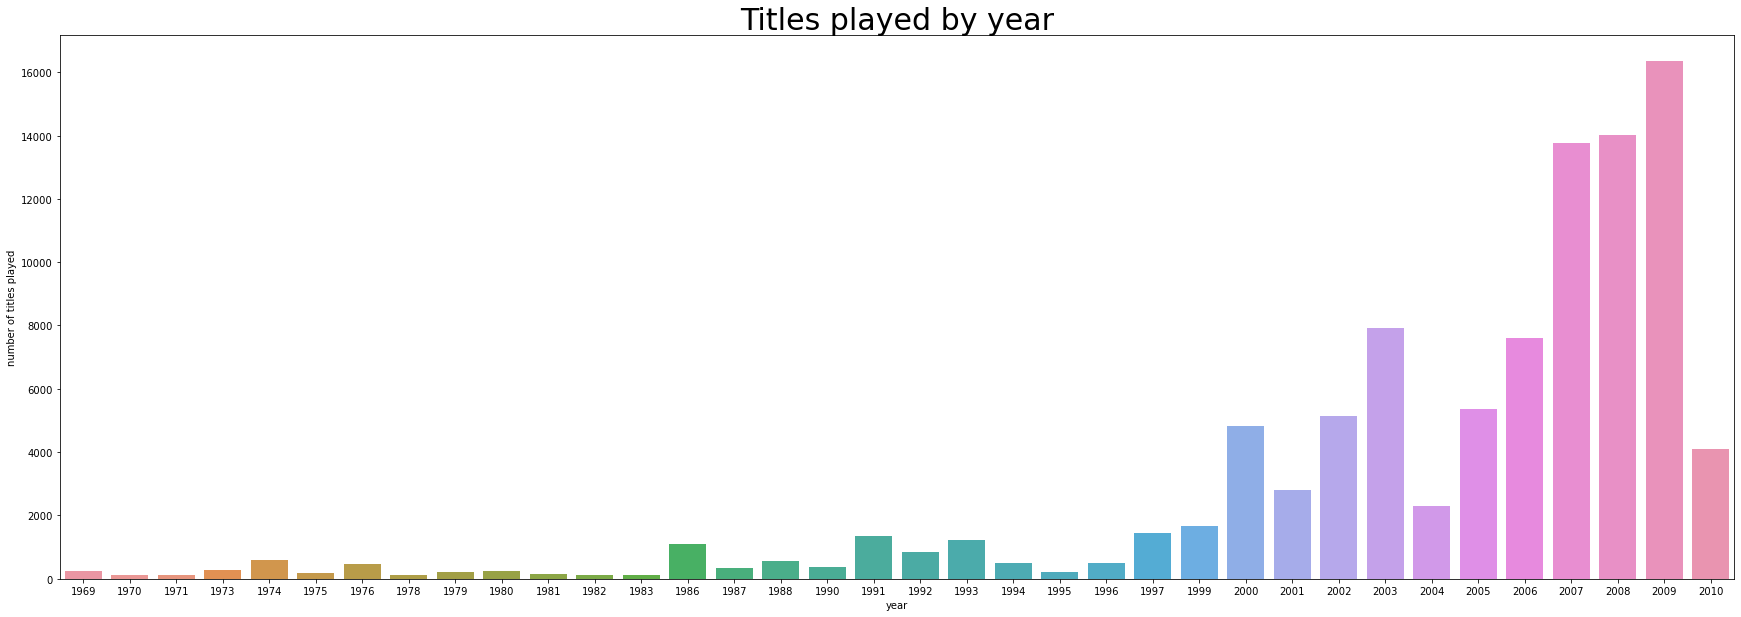

In [39]:
plt.figure(figsize=(30,10))
sns.barplot(x=count.index, y='title', data=count)
plt.title('Titles played by year', size=30)
plt.ylabel('number of titles played')
plt.show()

## **Proposed Approach:**

- **Potential Techniques** - We can explore popularity-based, similarity-based collaborative filtering(user-user and item-item), matrix factorization, clustering-based, and content-based recommendation systems.

- **Solution design:** 
  - Exploring the data and getting key insights
  - Applying the above mentioned five techniques and getting recommendations
  - Evaluating it on the F_1 score metric
  - Getting the best technique
  - Summary of potential benefits 
  - Recommendation for implementation 

- **The measure of success** - We will use F_1 score to calculate the effectiveness of the recommendation system.

**Now that we have explored the data, let's apply different algorithms to build recommendation systems**

### Popularity Based Recommendation Systems

#### As we have now explored the data, let's start building Recommendation systems

### Model 1: **Create Rank-Based Recommendation System**

Rank-based recommendation systems provide recommendations based on the most popular songs. This kind of recommendation system is useful when we have **cold start** problems. Cold start refers to the issue when we get a new user into the system and the machine is not able to recommend songs to the new user, as the user did not have any historical interactions in the dataset. In those cases, we can use a rank-based recommendation system to recommend songs to the new user.

To build the rank-based recommendation system, we take **average** of all the play_counts provided to each song and then rank them based on their average play_counts.

In [43]:
# calculating the average play_count
average_count = df.groupby('song_id')['play_count'].mean()

# calculating the frequency a song is played
play_freq = df.groupby('song_id')['play_count'].count()

# dataframe of average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

final_play.head()

,avg_count,play_freq
song_id,,
21,1.622642,265
22,1.492424,132
52,1.729216,421
62,1.728070,114
93,1.452174,115


Now, let's create a function to find the **top n songs** for a recommendation based on the average play count of song. We can also add a **threshold for a minimum number of playcounts** for a song to be considered for recommendation. 

In [44]:
def top_n_songs(data, n, min_interactions=100):
    """Recommends songs based on popularity -> average play_count and play_freq

    Args:
        data (dataframe): dataframe with song is, average play_count and play_freq
        n (int): number of songs that will be recommended
        min_interactions (int, optional): minimal play_freq to be considered. Defaults to 100.
    """
    
    # finding songs with minimum number of play_counts
    recommendations = data[data['play_freq'] > min_interactions]

    # sorting values w.r.t average count
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    # returns first n songs
    return recommendations.index[:n]

We can **use this function with different n's and minimum interactions** to get songs to recommend

##### Recommending top 10 Songs with 100 minimum interactions based on popularity

In [45]:
list(top_n_songs(final_play, 10, 100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

### **Collaborative Filtering Based Recommendation System**

In this type of recommendation system, `we do not need any information` about the users or songs. We only need user item interaction data to build a collaborative recommendation system. For example - 
<ol>
    <li><b>Ratings</b> provided by users. For example - ratings of books on goodread, movie ratings on imdb etc</li>
    <li><b>Likes</b> of users on different facebook posts, likes on youtube videos</li>
    <li><b>Use/buying</b> of a product by users. For example - buying different items on e-commerce sites</li>
    <li><b>Reading</b> of articles by readers on various blogs</li>
</ol>

#### Types of Collaborative Filtering
 * Similarity/Neighborhood based
 * User User Similarity Based  
 * Item Item similarity based

#### Building a baseline user user similarity based recommendation system

- Below we are building **similarity-based recommendation systems** using `Pearson` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library - `surprise` to build the remaining models, let's first import the necessary classes and functions from this library

In [46]:
!pip install surprise

In [47]:
# To compute the accuracy of models
from surprise import accuracy

# class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# class for loading datasets
from surprise.dataset import Dataset

# for tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# for splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# for implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# for implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing KFold cross-validation
from surprise.model_selection import KFold

#For implementing clustering-based recommendation system
from surprise import CoClustering

#### Before building the recommendation systems, let's  go over some basic terminologies we are going to use:
**Relevant songs** - A song that is actually **played higher than the threshold (here 1.5)** is relevant, if the **actual play_count is below the threshold then it is a non-relevant song**.  

**Recommended song** - A song that's **predicted play_count is higher than the threshold (here 1.5) is a recommended song**, if the **predicted play_count is below the threshold then that song will not be recommended to the user**.  

**False Negative (FN)** - It is the **frequency of relevant songs that are not recommended to the user**. If the relevant songs are not recommended to the user, then the user might not listen to the song. This would result in the **loss of opportunity for the service provider** which they would like to minimize.

**False Positive (FP)** - It is the **frequency of recommended songs that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant songs to the user. This would result in **loss of resources for the service provider** which they would also like to minimize.

**Recall** - It is the **fraction of actually relevant songs that are recommended to the user** i.e. if out of 10 relevant songs, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision** - It is the **fraction of recommended songs that are relevant actually** i.e. if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are the two most used performance metrics used in the assessment of recommendation systems.**

### Precision@k and Recall@ k
**Precision@k** - It is the **fraction of recommended songs that are relevant in `top k` predictions**. Value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  

**Recall@k** - It is the **fraction of relevant songs that are recommended to the user in `top k` predictions**.

**F1-Score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them. 

### Some useful functions
- Below function takes the **recommendation model** as input and gives the **precision@k and recall@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.

In [53]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # first map the predictions for each user
    user_est_true = defaultdict(list)

    # making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # number of recommended items in top k
        n_rec_k = sum((true_r >= threshold) for (est, _) in user_ratings[:k])

        # number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    #Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    #Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) #Command to print the overall precision
    print('Recall: ', recall) #Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.


Below we are loading the **dataset**, which is a **pandas dataframe**, into a **different format called `surprise.dataset.DatasetAutoFolds`** which is required by this library. To do this we will be **using the classes `Reader` and `Dataset`**

In [54]:
# initializing reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# loading the dataset
data = Dataset.load_from_df(df[['user_id', 'song_id', 'play_count']], reader)

# splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.4, random_state=42)

- Now we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.
- **KNNBasic** is an algorithm that is also **associated with the surprise package**, it is used to find the **desired similar songs among a given set of songs**.

- To compute **precision and recall**, a **threshold of 1.5 and k value of 30 is taken for the recommended and relevant play counts**.  
- The intuition of threshold 1.5 is that if the predicts that a user will listen to the song more than 1.5 times(can be understood 2 out of 3 if a non-integer value is getting hard to interpret) then that song should be recommended to that user. 
- In the **present case precision and recall both need to be optimized as the service provider would like to minimize both the losses discussed** above. Hence, the correct performance measure is the **F_1 score**. 

In [55]:
# declaring similarity options
sim_options = {'name': 'cosine', 'user_based':True}

# KNN algorithm is used to find desired similar items
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# let's compute precison@k, recall@k, and f_1 score with k=30
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.305
Recall:  0.692
F_1 score:  0.423


- We have calculated **RMSE** to check **how far the overall predicted play counts** are from the **actual play counts**.
- Intuition of Recall - We are getting a **recall of almost 0.70**, which means out of **all the relevant songs, 70% are recommended**. 
- Intuition of Precision - We are getting a **precision of almost 0.305**, which means **out of all the recommended songs, 30.5% are relevant**.
- Here **F_1 score** of the **baseline model is almost 0.423**. It indicates that **mostly recommended songs were relevant and relevant songs were recommended**. We will try to improve this later by using **GridSearchCV by tuning different hyperparameters** of this algorithm.

Let's now **predict play_counts for a user with `user_id=6958` and `song_id=1671`** as shown below.

In [56]:
sim_user_user.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

- The above output shows that **the actual play count for this user-item pair is 2 and the predicted is 1.80** by this **user-user-similarity-based baseline model**.

Below we are **predicting play_count for the same `userId=6958` but for a song which this user has not heard yet i.e. `song_id=3232`** 

In [57]:
sim_user_user.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

As we can see the **predicted play count for this user-item pair is 1.64** based on this user-user-similarity-based baseline model.

#### Improving similarity-based recommendation system by tuning its hyper-parameters

Below we will be tuning hyperparameters for the `KNNBasic` algorithms. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all play_counts. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise - 
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [58]:
# setting up parameter grid to tune the hyperparameters
param_grid = {'k':[10,20,30], 'min_k':[3,6,9],
              'sim_options': {'name':['cosine','pearson','pearson_baseline'],
                              'user_based': [True], 'min_support':[2,4]}}

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Computing the pearson

Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters** as shown above

Now let's build the **final model by using tuned values of the hyperparameters** which we received by using **grid search cross-validation**

In [60]:
# using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True, 'min_support':2}

# creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=9, random_state=1, verbose=False)

# training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# let's compute precision@k and recall@k also with k=30
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.32
Recall:  0.721
F_1 score:  0.443


- We can see from above that after tuning hyperparameters, **F_1 score of the tuned model is better than the baseline model.** Along with this **the RMSE of the model has gone down as compared to the model before hyperparameter tuning**. Hence, we can say that the model performance has improved after hyperparameter tuning.

Let's us now **predict play_count for a user with `userId`="6958", and song_id=1671 with the optimized model as shown below**

In [61]:
sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

- Here the model gives a **good prediction** in comparison to the actual play_count(2). 

Below we are predicting play_count for the same **`userId="6958"`** but for a song which this user has **not listened before** i.e. `song_id=3232`, by using the **optimized model** as shown below - 

In [62]:
sim_user_user_optimized.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

## Identifying similar users to a given user (nearest neighbors)

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric

In [63]:
sim_user_user_optimized.get_neighbors(0,5) 
# 0 is the inner id of the above user 

[42, 1131, 17, 186, 249]

#### Implementing the recommendation algorithm based on optimized KNNBasic model

Below we will be implementing a function where the input parameters are - 

- data: a **song** dataset
- user_id: a user id **against which we want the recommendations**
- top_n: the **number of songs we want to recommend**
- algo: the algorithm we want to use **for predicting the play_count**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [64]:
def get_recommendations(data, user_id, top_n, algo):

    # creating an empty list to store the recomended produt ids
    recommendations = []

    # creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')

    # extracting those business ids which the user_id has not visited yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # looping through each of the business ids which user_id has not interacted yer
    for item_id in non_interacted_products:
        # predicting the ratings for those non visited restaurant ids by this user
        est = algo.predict(user_id, item_id).est

        # appending the predicted ratings
        recommendations.append((item_id, est))

    # sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    # return top n highest predited rating products for this user
    return recommendations[:top_n]

#### Predicted top 5 songs for userId=6958 with user_user_similarity based recommendation system

In [65]:
recommendations = get_recommendations(df, 6958, 5, sim_user_user)

In [66]:
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.141147
1,614,2.525000
2,5653,2.514023
3,352,2.425000
4,6450,2.394927


### Correcting the play_counts and Ranking the above songs
While comparing the play counts of two songs, it is not only the **play_counts** that describe the **likelihood of the user to that product**. Along with the play_count the **number of users who have heard that song** also becomes important to consider. Due to this, we have calculated the **"corrected_ratings"** for each song. Commonly higher the **"play_count" of a product more it is liked by users**. To interpret the above concept, a **song with play count 4 with rating_count 3 is less liked in comparison to a song with play count 3 with a rating count of 50**. It has been **empirically found that the likelihood of the product is directly proportional to the inverse of the square root of the rating_count of the product**.

In [67]:
def ranking_songs(recommendations, final_rating):
    # sort the songs based on play counts
    ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

    # merge with the recommended songs to get predicted play_count
    ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings']), on='song_id', how='inner')

    # rank the songs based on corrected play_counts
    ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

    # sort the songs based on corrected play_counts
    ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)

    return ranked_songs

In [68]:
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,7224,107,3.141147,3.044473
1,614,373,2.525000,2.473222
2,5653,108,2.514023,2.417798
0,352,748,2.425000,2.388436
4,6450,102,2.394927,2.295913


### Item Item Similarity-based collaborative filtering recommendation systems 
* Above we have seen **similarity-based collaborative filtering** where similarity has seen **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between songs**. 

In [69]:
# declaring the similarity options
sim_options = {'name': 'pearson',
               'user_based': False}

# KNN algorithm is used to find desired similar items
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# train the algorithm on the trainset, and predict play_count for the testset
sim_item_item.fit(trainset)

# let us compute precions@k, recall@k, and f_1 score with k=30
precision_recall_at_k(sim_item_item)

RMSE: 1.0588
Precision:  0.27
Recall:  0.538
F_1 score:  0.36


- The baseline model is giving a good F_1 score. We will try to **improve this later by using GridSearchCV** by tuning different hyperparameters of this algorithm.

Let's now **predict the play_count for a user with `userId=6958` and `song_id=1671`** as shown below. Here the user has already heard the song with song_id 1671.

In [70]:
sim_item_item.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.92   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.91669781984001, details={'actual_k': 10, 'was_impossible': False})

- The above output shows that **item-item similarity** based model is making a **good prediction** where the actual play_count is 2. 

Below we are **predicting play count for the same userId=6958 but for a song which this user has not heard yet i.e. `song_id=3232`** 

In [71]:
#predicting play count for a sample user with song not heard by the user.
sim_item_item.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.00   {'actual_k': 5, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.0, details={'actual_k': 5, 'was_impossible': False})

As we can see the **predicted play_count for this user-song pair is low** based on this **item-item similarity-based baseline model**.

#### Improving similarity-based recommendation system by tuning its hyper-parameters
Below we will be **tuning hyperparameters for the `KNNBasic` algorithms**. Let's try to understand **some of the hyperparameters** of the KNNBasic algorithm:
- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all play_counts. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise - 
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [72]:
# setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

# performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting the data
gs.fit(data)

# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Done computing similarity matrix.
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Computing the pearson similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Estimating biases using als...
Done computing similarity matrix.
Computing the pearson_baseline simil

Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation

In [74]:
# using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False, "min_support":4}

# creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=6, random_state=1, verbose=False)

# training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.327
Recall:  0.696
F_1 score:  0.445


- We can see from above that after tuning hyperparameters, **F_1 score of the tuned model is much better than the baseline model**. Also, there is a considerable fall in the RMSE value with tuning. Hence the tuned model is doing better than the earlier one.

Let's us now predict **play_count for an user with `userId=6958` and for `songs_id=1671`** with the **optimized model** as shown below

In [75]:
sim_item_item_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

- Here the optimized model is predicting a very good play_count (almost **1.96**) for the product whose actual play_count is 2. 

Below we are **predicting play_count** for the same **`userId=6958`** but for a song which this user **has not listened before** i.e. `songs_id==3232`, by using the optimized model as shown below - 

In [76]:
sim_item_item_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

- For an unknown product the model is predicting a play_count of **1.70**.

We can also find out **similar users** to a given user or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding 5 most similar users to the user with internal id 0 based on the `msd` distance metric

In [77]:
sim_item_item_optimized.get_neighbors(0, k=5)

[124, 523, 173, 205, 65]

#### Predicted top 5 products for userId=6958 with similarity based recommendation system

In [79]:
#Making top 5 recommendations for user_id 6958 with similarity-based recommendation engine.
recommendations = get_recommendations(df, 6958, 5, sim_item_item)

In [80]:
#Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['songs_id', 'predicted_play_count'])

,songs_id,predicted_play_count
0,750,5.000000
1,4377,4.206578
2,139,3.875420
3,5616,3.868549
4,861,3.840408


In [81]:
#Applying the ranking_songs function and sorting it based on corrected play_counts. 
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,750,123,5.000000,4.909833
0,4377,159,4.206578,4.127273
3,139,119,3.875420,3.783750
4,5616,113,3.868549,3.774477
1,861,126,3.840408,3.751321


* Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### Model Based Collaborative Filtering - Matrix Factorization
Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.
#### Singular Value Decomposition (SVD)
SVD is used to **compute the latent features** from the **user-song matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.
#### Building a baseline matrix factorization recommendation system

In [82]:
# using SVD matrix factorization
svd = SVD(random_state=1)

# training the algorithm on the trainset
svd.fit(trainset)

# Let us compute precision@k and recall@k with k =30.
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.303
Recall:  0.633
F_1 score:  0.41


- The baseline model with the algorithm is giving a nice F-1 score (almost **41%**). It indicates a good performance by the model. The RMSE of the model is 1.0252.

- Let's now predict the play_count for a user with `userId="6958"` and `song_id=1671 as shown below
- Here the user has already heard the song.

In [83]:
#Making prediction.
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

As we can see - **the actual play_counts** for this user-song pair is 2 and the predicted play_count is **1.27** by this matrix **factorization-based baseline model**. It seems like we have under-estimated the play_count. We will try to fix this later by **tuning the hyperparameters** of the model using GridSearchCV

Below we are predicting play_count for the same `userId=6958` but for a song which this user has not listened before i.e. `song_id=3232`, as shown below - 

In [84]:
#Making prediction. 
svd.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

We can see that the **estimated play_count** for this **user-song pair** is 1.98 based on this **matrix factorization based baseline model**

#### Improving matrix factorization based recommendation system by tuning its hyper-parameters

In SVD, play_count is predicted as - 
$$\hat{r}_{u i}=\mu+b_{u}+b_{i}+q_{i}^{T} p_{u}$$
If user $u$ is unknown, then the bias $b_{u}$ and the factors $p_{u}$ are assumed to be zero. The same applies for item $i$ with $b_{i}$ and $q_{i}$.
To estimate all the unknown, we minimize the following regularized squared error:
$$\sum_{r_{u i} \in R_{\text {train }}}\left(r_{u i}-\hat{r}_{u i}\right)^{2}+\lambda\left(b_{i}^{2}+b_{u}^{2}+\left\|q_{i}\right\|^{2}+\left\|p_{u}\right\|^{2}\right)$$
The minimization is performed by a very straightforward **stochastic gradient descent**:
$$\begin{aligned} b_{u} & \leftarrow b_{u}+\gamma\left(e_{u i}-\lambda b_{u}\right) \\ b_{i} & \leftarrow b_{i}+\gamma\left(e_{u i}-\lambda b_{i}\right) \\ p_{u} & \leftarrow p_{u}+\gamma\left(e_{u i} \cdot q_{i}-\lambda p_{u}\right) \\ q_{i} & \leftarrow q_{i}+\gamma\left(e_{u i} \cdot p_{u}-\lambda q_{i}\right) \end{aligned}$$
There are many hyperparameters to tune in this algorithm, you can find a full list of hyperparameters [here](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)
Below we will be tuning only three hyperparameters -
- **n_epochs**: The number of iteration of the SGD algorithm
- **lr_all**: The learning rate for all parameters
- **reg_all**: The regularization term for all parameters

In [85]:
# set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# performing 3-fold gridsearch cross validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# fitting data
gs_.fit(data)

# best RMSE score
print(gs_.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.012738973514167
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


Once the **grid search** is complete, we can get the **optimal values** for each of those hyperparameters as shown above

Now we will **build the final model** by using **tuned values** of the hyperparameters which we received by using grid search cross-validation

In [86]:
svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

svd_optimized = svd_optimized.fit(trainset)

precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.307
Recall:  0.635
F_1 score:  0.414


- We can see from above that the **tuned model** is showing a slightly better F_1 score and also a very slight growth is there in the model. Hence the tuned model is doing better than the earlier model.

Let's now predict the play_count for a user with `userId=6958` and `song_id=1671` with the optimized model as shown below

In [87]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671.
svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

Here the predicted play_count is **1.34** for a song whose actual play_count is **2**.

In [88]:
#Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
svd_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

For an unseen song the play_count given by the optimized model is **1.44**. 

In [90]:
#Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm.
svd_recommendations = get_recommendations(df, 6958, 5, svd_optimized)

In [91]:
#Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


### Conclusion
In this case study, we built recommendation systems using five different algorithms. They are as follows:
- rank-based using averages
- User-user-similarity-based collaborative filtering
- Item-item-similarity-based collaborative filtering
- model-based (matrix factorization) collaborative filtering  

We have seen how they are different from each other and what kind of data is needed to build each of these recommendation systems. We can further combine all the recommendation techniques we have seen.  
To demonstrate **"user-user-similarity-based collaborative filtering","item-item-similarity-based collaborative filtering", and "model-based (matrix factorization) collaborative filtering"**, **surprise** library has been demonstrated. For these algorithms **grid search cross-validation is used to find the best working model**, and using that the **corresponding predictions are made**.



#### **Proposal for the final solution design:**

We will use the user-user similarity-based collaborative filtering recommendation system final solution since it is more robust and gives a high F_1 score. We have predicted the play counts for all the users that have not listened to a particular song.